<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/KMeansElbowMethodFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

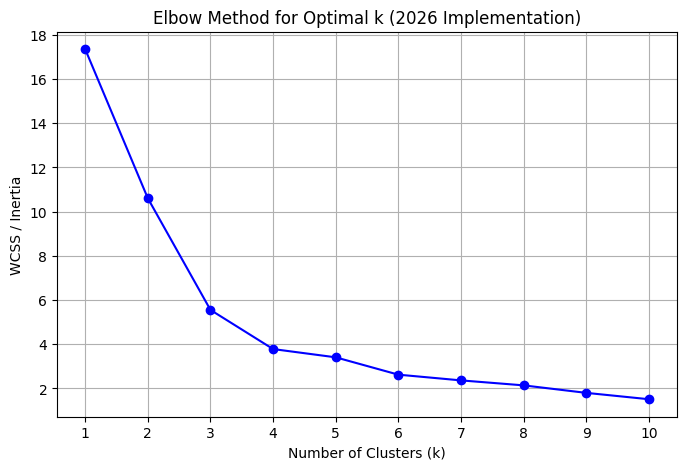

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansFromScratch:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.inertia_ = 0

    def euclidean_distance(self, p1, p2):
        return np.sqrt(np.sum((p1 - p2)**2))

    def fit(self, X):
        # Randomly initialize centroids from the dataset
        idx = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[idx]

        for _ in range(self.max_iters):
            # 1. Assign points to nearest centroid using Euclidean distance
            # distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            distances = []
            for point in X:
                distance = [self.euclidean_distance(point, c) for c in self.centroids]
                distances.append(distance)
            labels = np.argmin(distances, axis=1)

            # 2. Update centroids by taking the mean of assigned points
            new_centroids = np.array([X[labels == i].mean(axis=0) if len(X[labels == i]) > 0
                                      else self.centroids[i] for i in range(self.k)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

        # Calculate final WCSS (Inertia)
        final_distances = np.min(distances, axis=1)
        self.inertia_ = np.sum(final_distances**2)
        return self


# Generate or provide your dataset 'X'
X = np.random.rand(100, 2)

wcss = []
k_range = range(1, 11)

for k in k_range:
    model = KMeansFromScratch(k=k)
    model.fit(X)
    wcss.append(model.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k (2026 Implementation)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()
